# Comparisons

In this notebook, we explore several predefined data setups, and consider clustering using all 3 algorithms. For the Spectral examples, we consider a pre-defined search range over values of $\sigma$, and choose the optimal. We report our classifications as a table. 

In [18]:
%matplotlib inline
import numpy as np
from clustering import Kmeans, Spectral
from clustering.kernel import RBF_kernel
from clustering.utils import purity, plot_laplacian
import matplotlib.pyplot as plt


def sample_ball(r, dim=2, n=100, s=0):
    """
    A function to sample from the unit ball, given an input radius.
    """
    u = np.random.randn(dim, n)
    unorm = np.sqrt(np.sum(np.square(u), axis=0))*np.identity(n)
    return r*u.dot(np.linalg.pinv(unorm)) + s*np.random.randn(dim, n)
-

# Simulation 1: Euclidian Center Separation

In this simulation, we have good euclidian center separation.

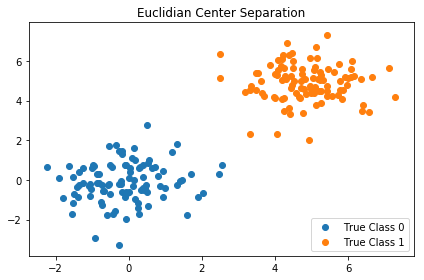

In [19]:

d=2  # 2d data sampled
n=100  # number of points to sample
covar1 = 1*np.identity(d)  # simulated data with I covariance
# simulate n samples of zero-mean, gaussian noise, just like the model
# specifies
data1 = np.random.multivariate_normal(mean=np.zeros((d,)), cov=covar1,
                                      size=n).transpose()
covar2 = 1*np.identity(d)
mean2 = 5*np.ones((d,))  # place far away so perfectly separable
data2 = np.random.multivariate_normal(mean=mean2, cov=covar2,
                                      size=n).transpose()
data = np.hstack((data1, data2))
# the true labels are class 0 for first half, and then class 1 for second half
true_labels = np.concatenate((0*np.ones((n,)), 1*np.ones((n,))))
# randomly permute the labels
idx = np.array(range(0, len(true_labels)))
true_labels = true_labels[idx]
np.random.shuffle(idx)
data = data[:, idx]
true_labels = true_labels[idx]

# visualize
fig = plt.figure()
ax = fig.add_subplot(111)
scat1 = ax.scatter(data[0, true_labels == 0], data[1, true_labels == 0])
scat2 = ax.scatter(data[0, true_labels == 1], data[1, true_labels == 1])
ax.set_title('Euclidian Center Separation')
ax.legend((scat1, scat2), ('True Class 0', 'True Class 1'), loc='lower right')
fig.tight_layout()
fig.show()

1.0
(30.0, 1, 1.0)
(30.0, 2, 1.0)


(1.0, (30.0, 1, 1.0), (30.0, 2, 1.0))

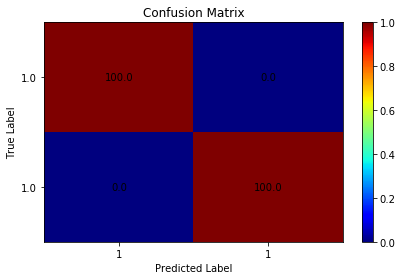

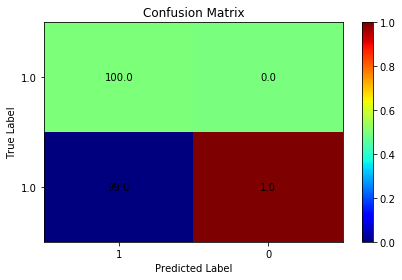

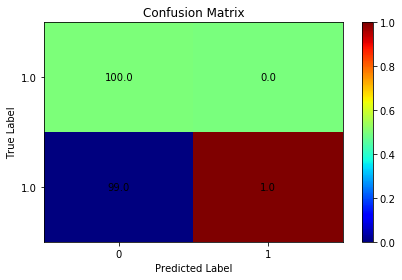

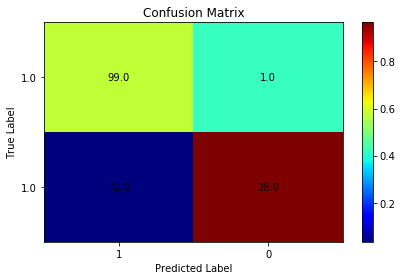

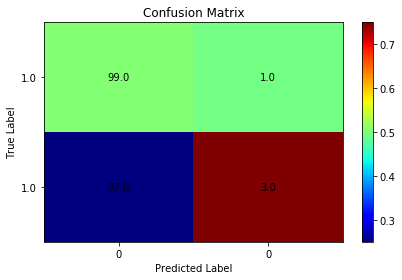

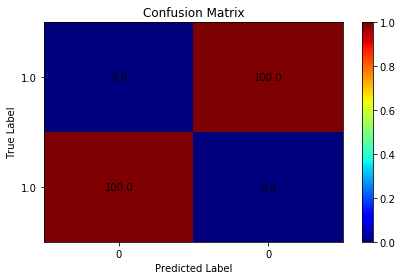

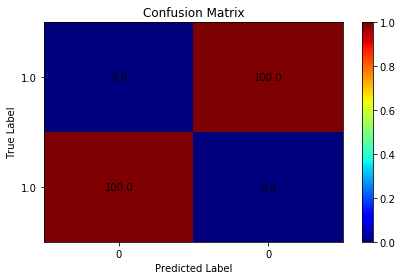

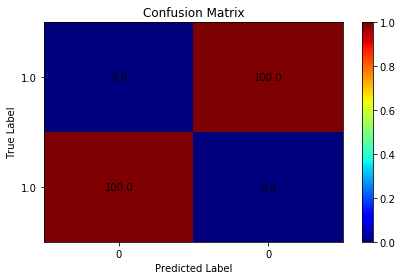

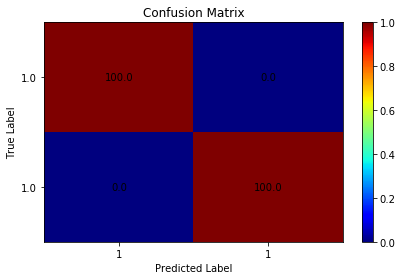

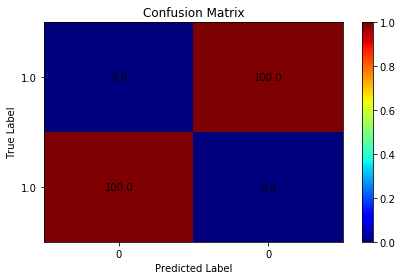

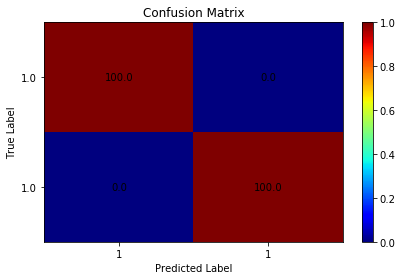

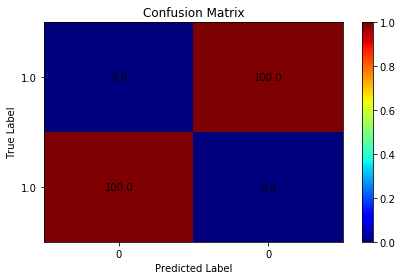

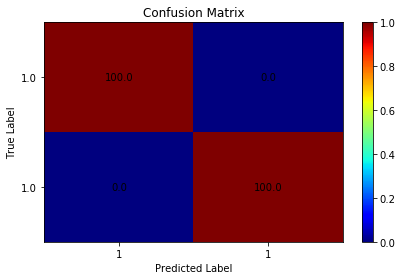

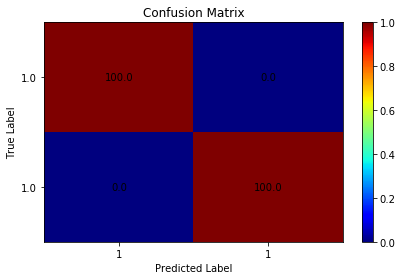

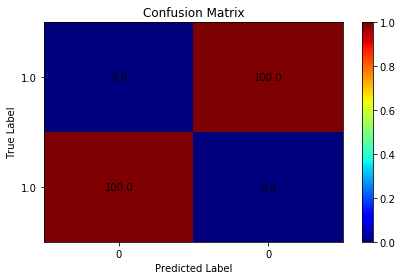

In [20]:
parameter_sweep(data, true_labels, 2)

# Simulation 2: Euclidian Center difference, Less Separation

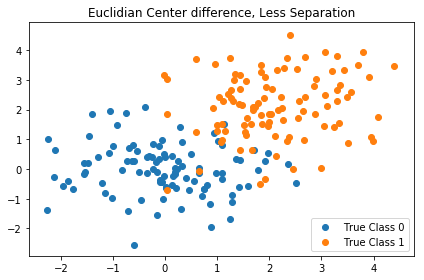

In [40]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from clustering import Kmeans

d=2  # 2d data sampled
n=100  # number of points to sample
covar1 = 1*np.identity(d)  # simulated data with I covariance
# simulate n samples of zero-mean, gaussian noise, just like the model
# specifies
data1 = np.random.multivariate_normal(mean=np.zeros((d,)), cov=covar1,
                                      size=n).transpose()
covar2 = 1*np.identity(d)
mean2 = 2*np.ones((d,))  # place far away so perfectly separable
data2 = np.random.multivariate_normal(mean=mean2, cov=covar2,
                                      size=n).transpose()
data = np.hstack((data1, data2))
# the true labels are class 0 for first half, and then class 1 for second half
true_labels = np.concatenate((0*np.ones((n,)), 1*np.ones((n,))))
# randomly permute the labels
idx = np.array(range(0, len(true_labels)))
true_labels = true_labels[idx]
np.random.shuffle(idx)
data = data[:, idx]
true_labels = true_labels[idx]

# visualize
fig = plt.figure()
ax = fig.add_subplot(111)
scat1 = ax.scatter(data[0, true_labels == 0], data[1, true_labels == 0])
scat2 = ax.scatter(data[0, true_labels == 1], data[1, true_labels == 1])
ax.set_title('Euclidian Center difference, Less Separation')
ax.legend((scat1, scat2), ('True Class 0', 'True Class 1'), loc='lower right')
fig.tight_layout()
fig.show()

0.915
(0.5, 1, 0.935)
(0.5, 2, 0.935)


(0.91500000000000004, (0.5, 1, 0.935), (0.5, 2, 0.935))

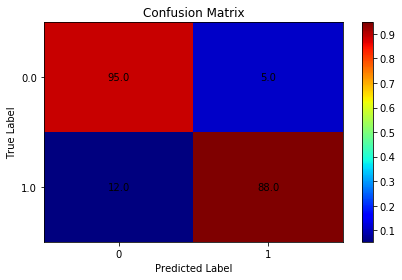

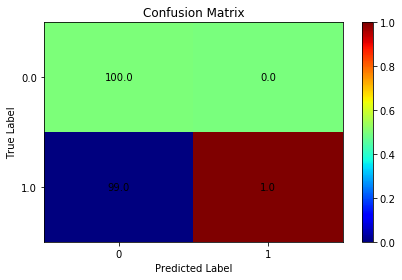

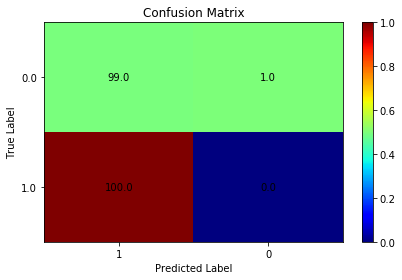

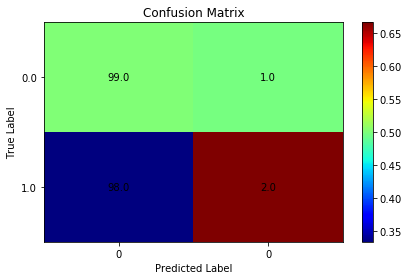

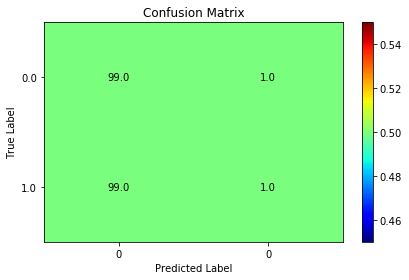

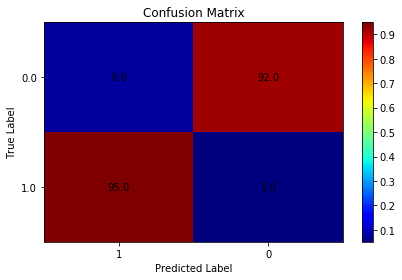

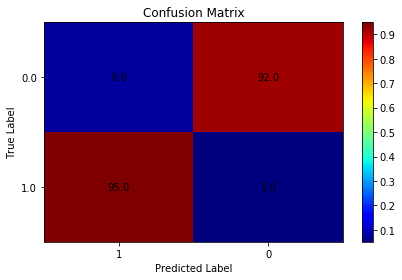

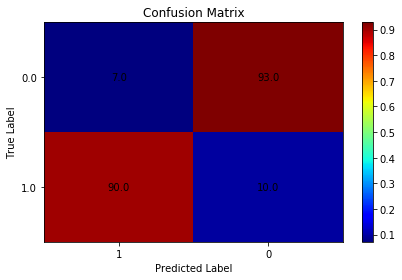

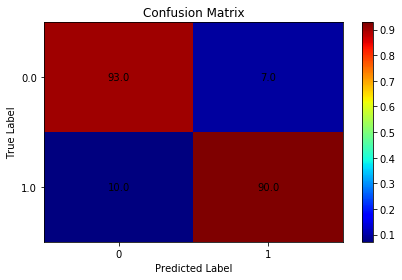

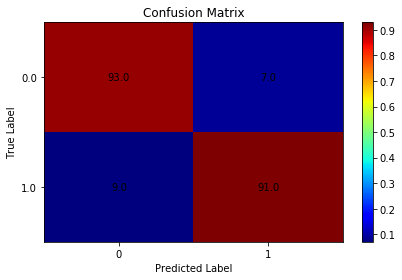

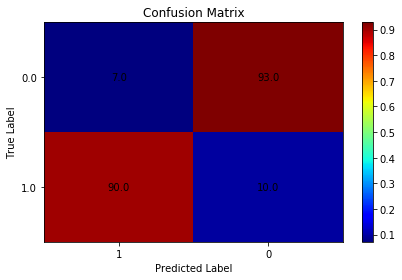

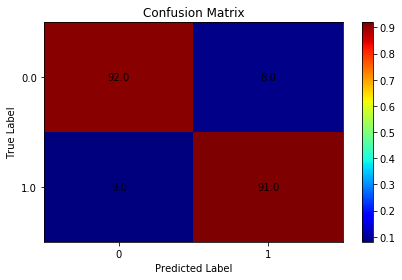

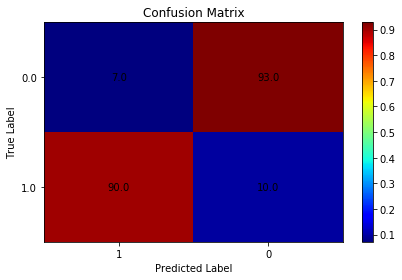

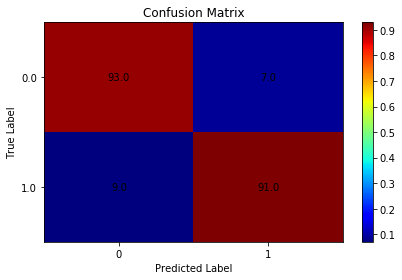

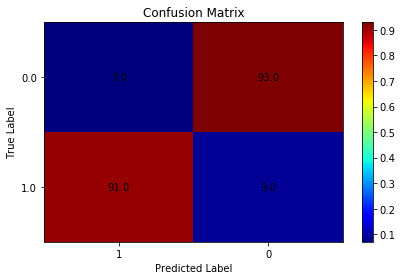

In [22]:
parameter_sweep(data, true_labels, 2)

# Simulation 3: Euclidian Center Inseparable Example

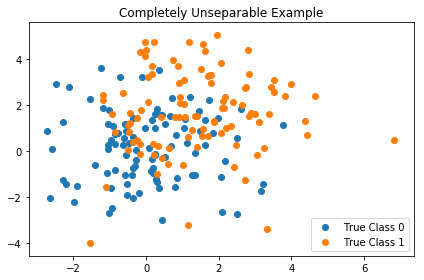

In [25]:

d=2  # 2d data sampled
n=100  # number of points to sample
covar1 = 2*np.identity(d)  # simulated data with I covariance
# simulate n samples of zero-mean, gaussian noise, just like the model
# specifies
data1 = np.random.multivariate_normal(mean=np.zeros((d,)), cov=covar1,
                                      size=n).transpose()
covar2 = 3*np.identity(d)
mean2 = 1.5*np.ones((d,))  # place far away so perfectly separable
data2 = np.random.multivariate_normal(mean=mean2, cov=covar2,
                                      size=n).transpose()
data = np.hstack((data1, data2))
# the true labels are class 0 for first half, and then class 1 for second half
true_labels = np.concatenate((0*np.ones((n,)), 1*np.ones((n,))))
# randomly permute the labels
idx = np.array(range(0, len(true_labels)))
true_labels = true_labels[idx]
np.random.shuffle(idx)
data = data[:, idx]
true_labels = true_labels[idx]

# visualize
fig = plt.figure()
ax = fig.add_subplot(111)
scat1 = ax.scatter(data[0, true_labels == 0], data[1, true_labels == 0])
scat2 = ax.scatter(data[0, true_labels == 1], data[1, true_labels == 1])
ax.set_title('Completely Unseparable Example')
ax.legend((scat1, scat2), ('True Class 0', 'True Class 1'), loc='lower right')
fig.tight_layout()
fig.show()

0.59
(10.0, 1, 0.77)
(30.0, 2, 0.78)


(0.58999999999999997, (10.0, 1, 0.77), (30.0, 2, 0.78))

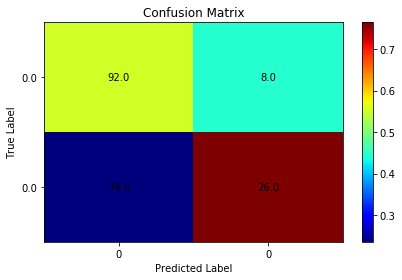

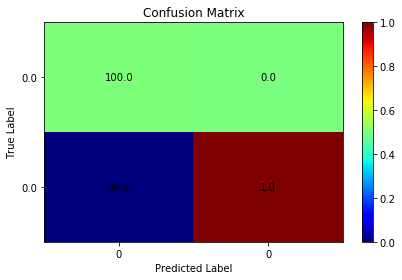

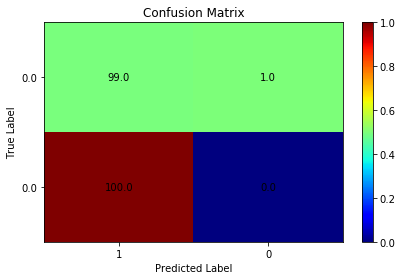

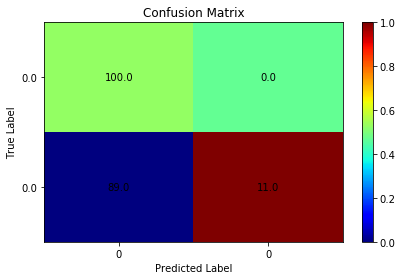

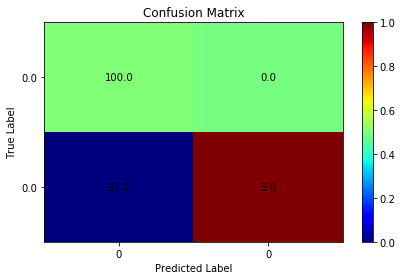

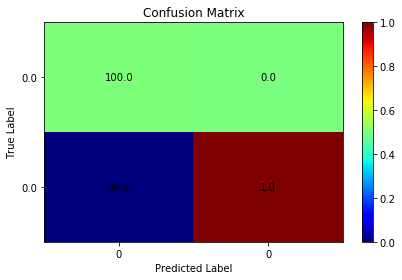

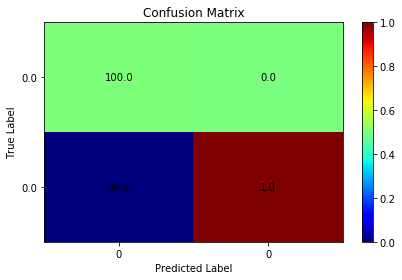

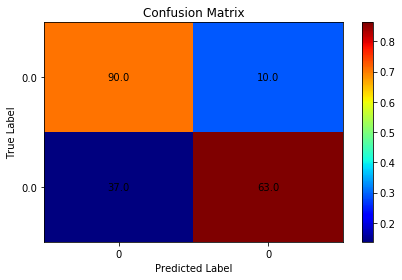

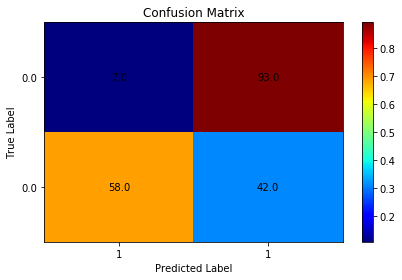

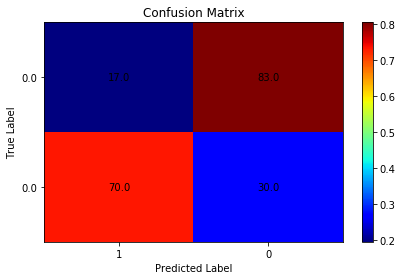

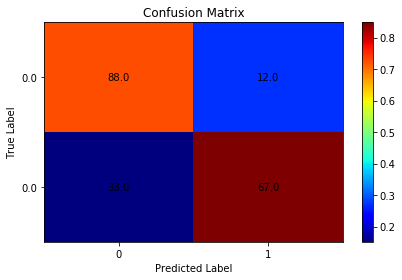

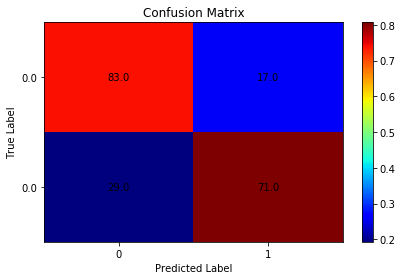

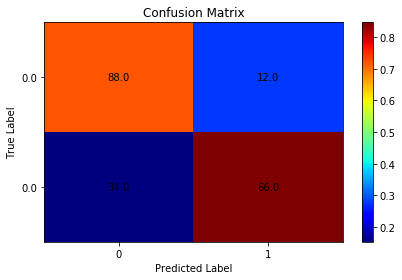

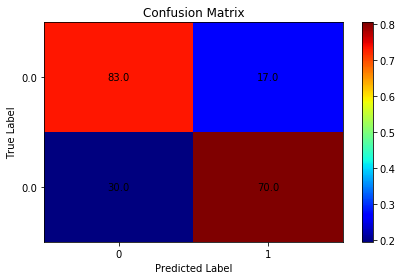

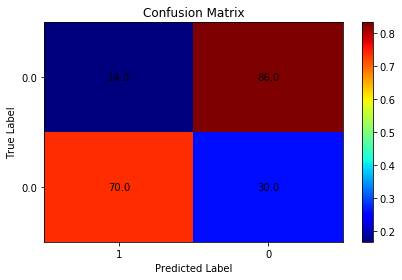

In [24]:
parameter_sweep(data, true_labels, 2)

# Simulation 4: Multi Class with Linear Separability

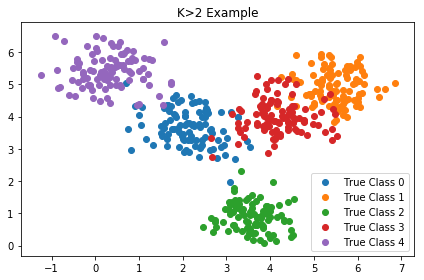

In [27]:

d=2  # 2d data sampled
n=100  # number of points to sample
K=5
xmean = np.random.uniform(low=0, high=7, size=K).tolist()
ymean = np.random.uniform(low=0, high=7, size=K).tolist()
variance = np.array([0.3, 0.3, 0.2, .3, 0.3]).tolist()

data_per_class = []
for i, (x, y, v) in enumerate(zip(xmean, ymean, variance)):
    data_per_class.append(np.random.multivariate_normal(mean = np.array([x, y]),
                                                        cov = v*np.identity(d),
                                                        size=n).transpose())

for i, d in enumerate(data_per_class):
    if i == 0:
        data = data_per_class[i]
        true_labels = i*np.ones((n,))
    else:
        data = np.hstack((data, data_per_class[i]))
        true_labels = np.concatenate((true_labels, i*np.ones((n,))))

idx = np.array(range(0, len(true_labels)))
np.random.shuffle(idx)
np.random.shuffle(idx)
data = data[:, idx]
true_labels = true_labels[idx]

# visualize
fig = plt.figure()
ax = fig.add_subplot(111)
label = []
scat = []
for i in range(0, K):
    scat.append(ax.scatter(data[0, true_labels == i],
                           data[1, true_labels == i]))
    label.append('True Class {}'.format(i))

ax.set_title('K>2 Example')
ax.legend(tuple(scat), tuple(label), loc='lower right')
fig.tight_layout()
fig.show()

0.83
(0.5, 1, 0.944)
(1.0, 2, 0.944)


(0.82999999999999996, (0.5, 1, 0.944), (1.0, 2, 0.944))

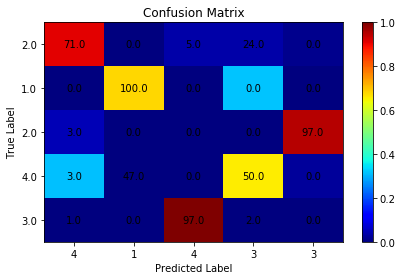

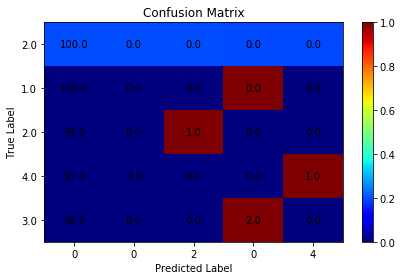

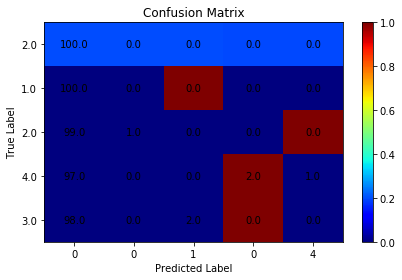

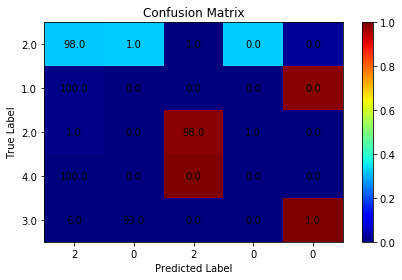

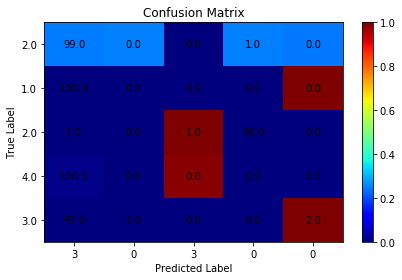

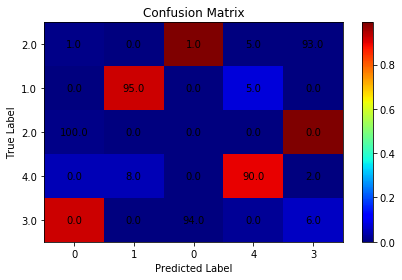

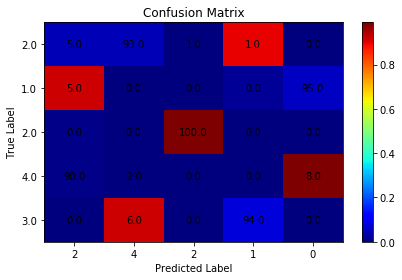

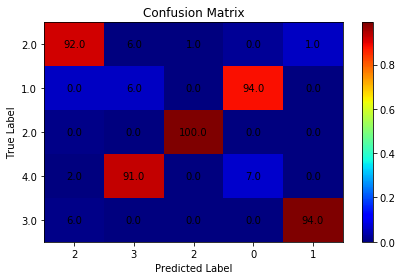

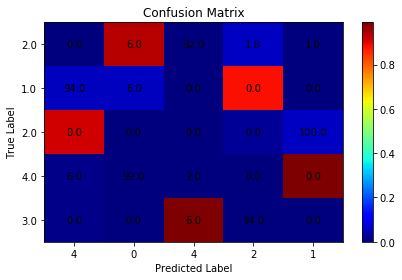

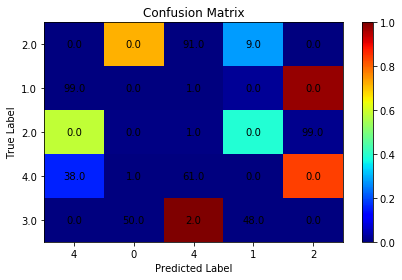

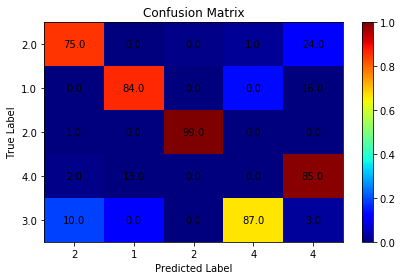

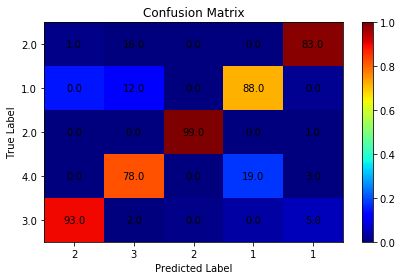

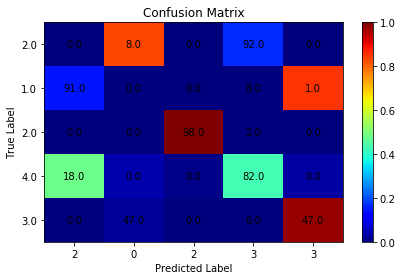

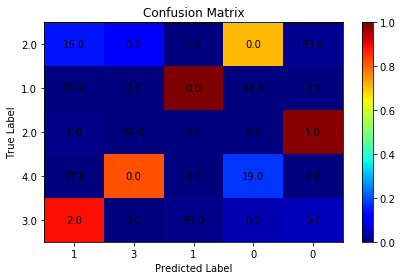

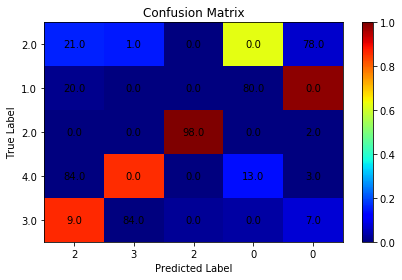

In [28]:
parameter_sweep(data, true_labels, 5)

# Simulation 5: Radial Difference, K=2

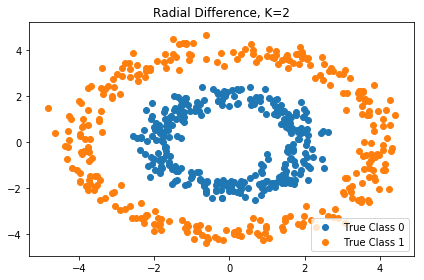

In [41]:

n=300
dim=2
s=0.3
data1 = sample_ball(r=2, dim=dim, n=n, s=s)
data2 = sample_ball(r=4, dim=dim, n=n, s=s)
true_labels = np.concatenate((0*np.ones((n,)), 1*np.ones((n,))))
data = np.hstack((data1, data2))
idx = range(0, len(true_labels))
#np.random.shuffle(idx)
# randomly permute
data = data[:, idx]
true_labels = true_labels[idx]

# visualize
fig = plt.figure()
ax = fig.add_subplot(111)
scat1 = ax.scatter(data[0, true_labels == 0], data[1, true_labels == 0])
scat2 = ax.scatter(data[0, true_labels == 1], data[1, true_labels == 1])
ax.set_title('Radial Difference, K=2')
ax.legend((scat1, scat2), ('True Class 0', 'True Class 1'), loc='lower right')
fig.tight_layout()
fig.show()

0.506666666667
(0.1, 1, 1.0)
(0.5, 2, 0.7183333333333334)


(0.50666666666666671, (0.1, 1, 1.0), (0.5, 2, 0.7183333333333334))

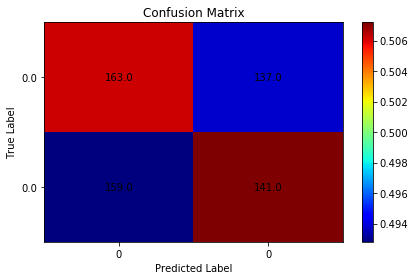

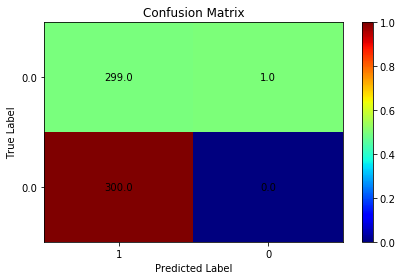

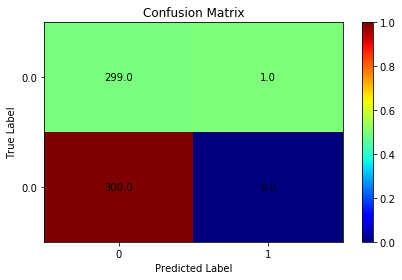

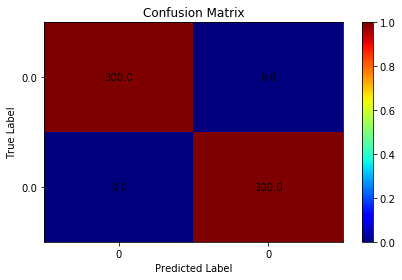

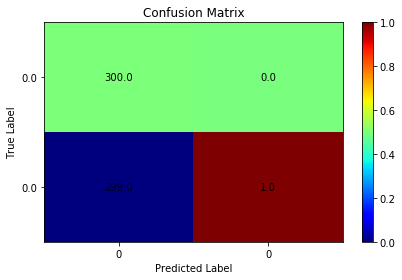

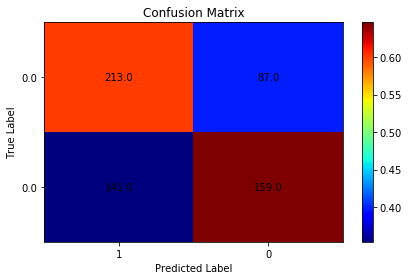

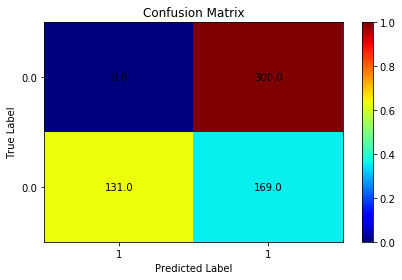

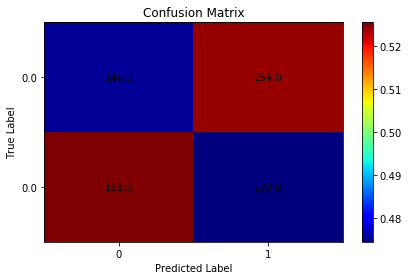

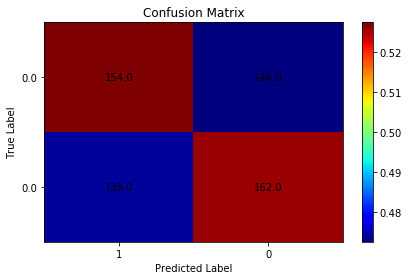

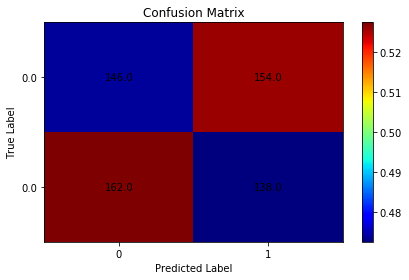

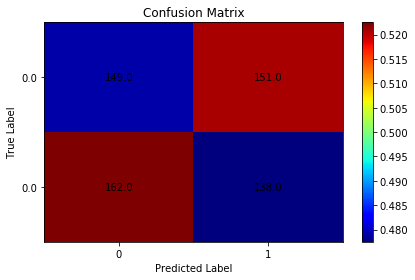

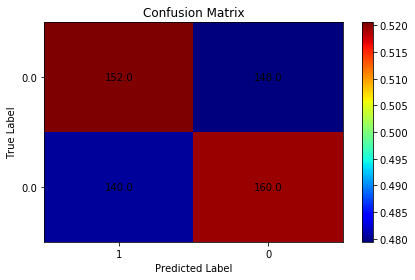

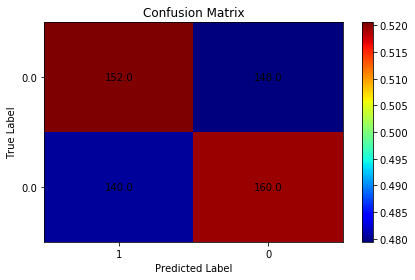

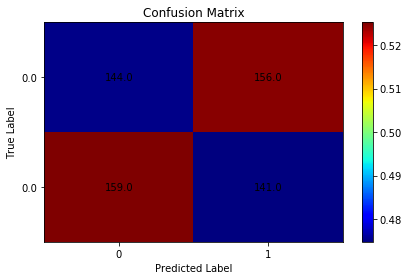

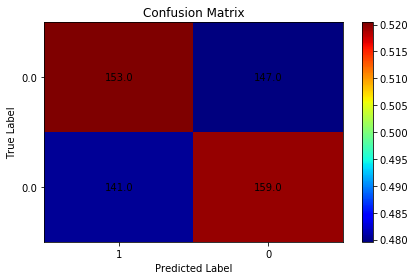

In [39]:
parameter_sweep(data, true_labels, 2)

# Simulation 6: Radial Difference, K=3

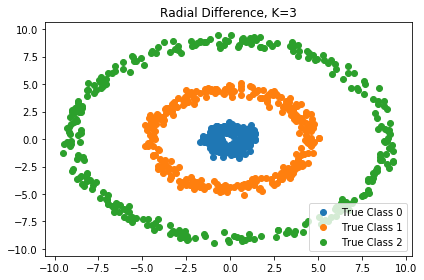

In [43]:
n=300
dim=2
s=0.3
data1 = sample_ball(r=1, dim=dim, n=n, s=s)
data2 = sample_ball(r=4.5, dim=dim, n=n, s=s)
data3 = sample_ball(r=9, dim=dim, n=n, s=s)
true_labels = np.concatenate((0*np.ones((n,)), 1*np.ones((n,)),
                              2*np.ones((n,))))
data = np.hstack((data1, data2, data3))
idx = range(0, len(true_labels))
np.random.shuffle(idx)
#randomly permute
#data = data[:, idx]
#true_labels = true_labels[idx]

# visualize
fig = plt.figure()
ax = fig.add_subplot(111)
scat1 = ax.scatter(data[0, true_labels == 0], data[1, true_labels == 0])
scat2 = ax.scatter(data[0, true_labels == 1], data[1, true_labels == 1])
scat3 = ax.scatter(data[0, true_labels == 2], data[1, true_labels == 2])
ax.set_title('Radial Difference, K=3')
ax.legend((scat1, scat2, scat3), ('True Class 0', 'True Class 1', 'True Class 2'),
          loc='lower right')
fig.tight_layout()
fig.show()

0.508888888889
(0.5, 1, 1.0)
(0.5, 2, 1.0)


(0.50888888888888884, (0.5, 1, 1.0), (0.5, 2, 1.0))

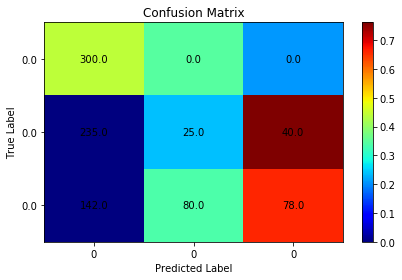

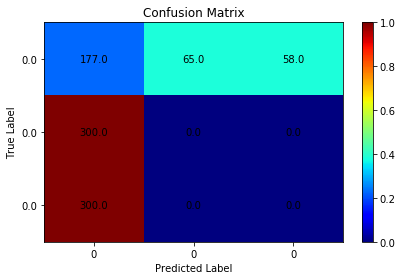

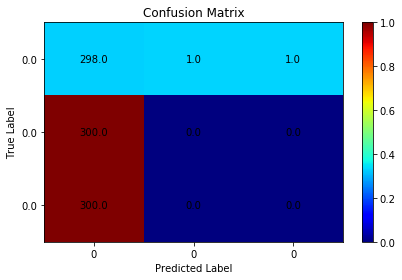

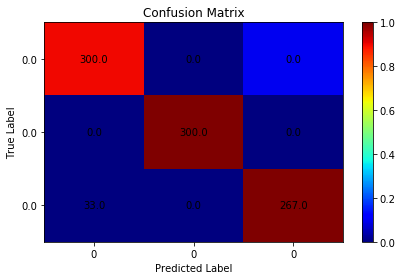

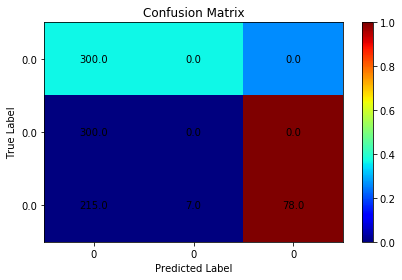

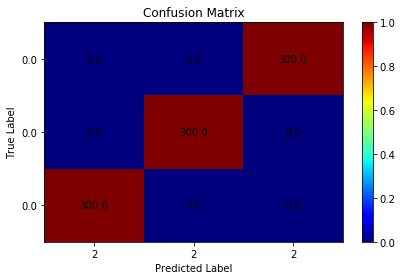

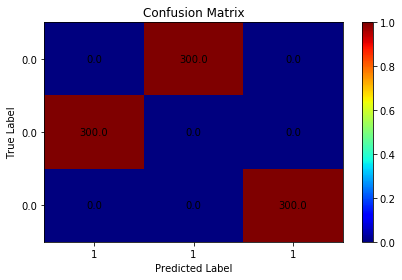

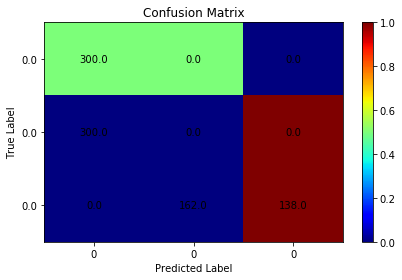

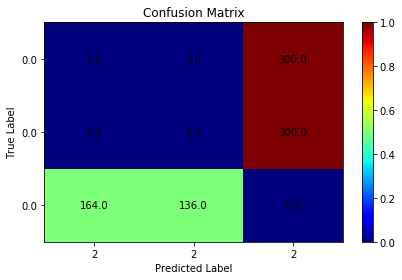

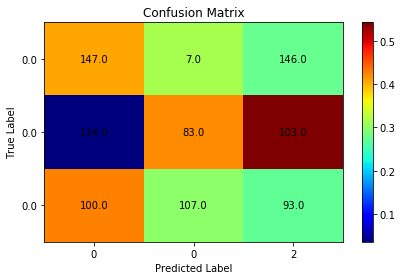

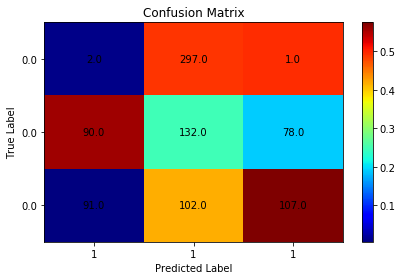

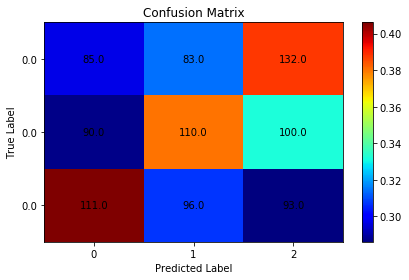

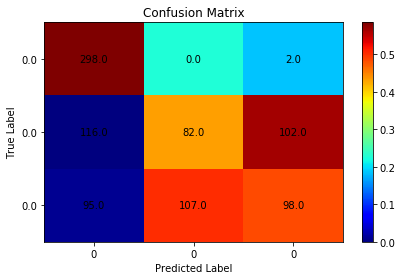

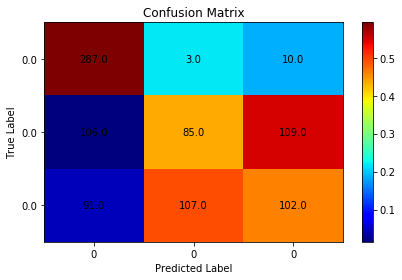

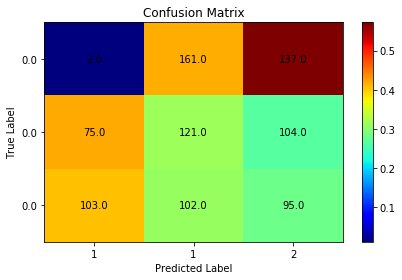

In [34]:
parameter_sweep(data, true_labels, 3)

# Simulation 7: Non-Concentric Spheres

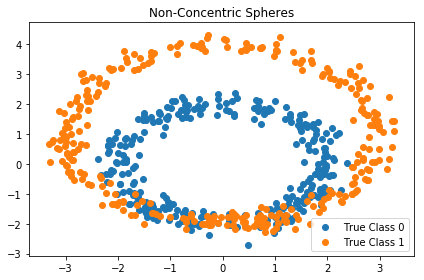

In [42]:
n=300
dim=2
s=0.2
data1 = sample_ball(r=2, dim=dim, n=n, s=s)
new_mean = np.identity(dim)
new_mean[0] = 0
data2 = sample_ball(r=3, dim=dim, n=n, s=s) + new_mean.dot(np.ones((dim, n)))
true_labels = np.concatenate((0*np.ones((n,)), 1*np.ones((n,))))
data = np.hstack((data1, data2))
idx = range(0, len(true_labels))
#np.random.shuffle(idx)
# randomly permute
data = data[:, idx]
true_labels = true_labels[idx]

# visualize
fig = plt.figure()
ax = fig.add_subplot(111)
scat1 = ax.scatter(data[0, true_labels == 0], data[1, true_labels == 0])
scat2 = ax.scatter(data[0, true_labels == 1], data[1, true_labels == 1])
ax.set_title('Non-Concentric Spheres')
ax.legend((scat1, scat2), ('True Class 0', 'True Class 1'), loc='lower right')
fig.tight_layout()
fig.show()

0.535
(0.5, 1, 0.58)
(0.5, 2, 0.67)


(0.53500000000000003, (0.5, 1, 0.58), (0.5, 2, 0.67))

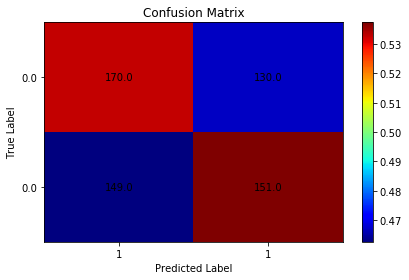

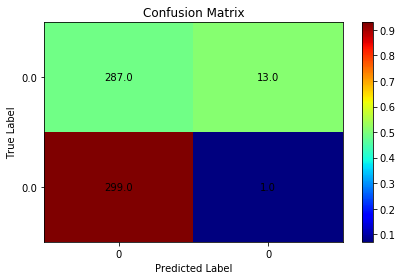

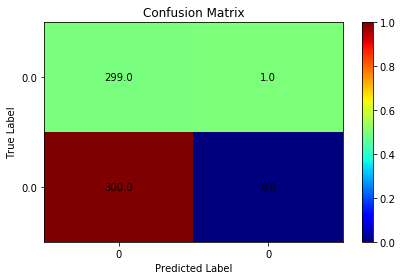

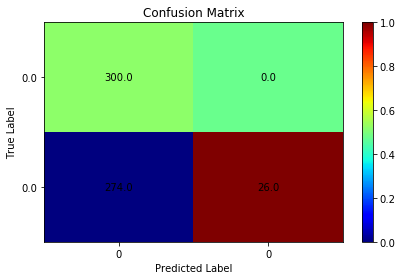

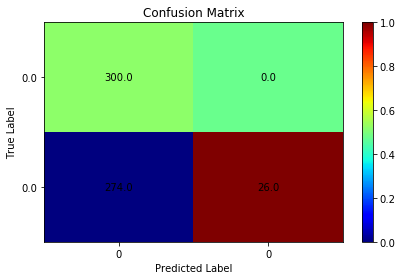

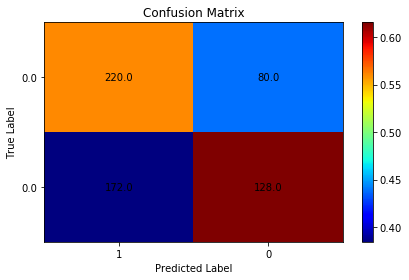

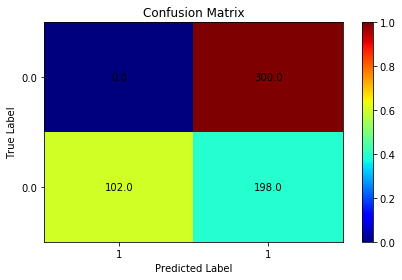

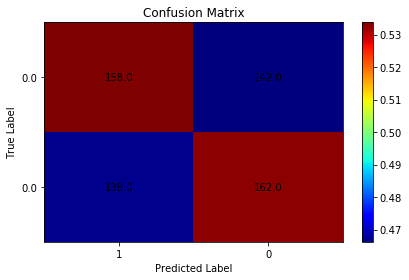

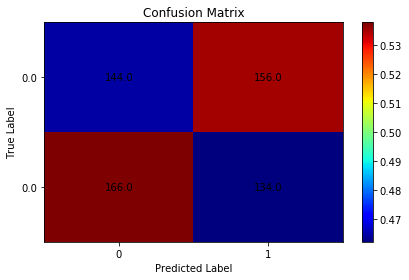

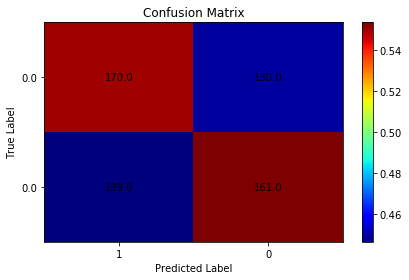

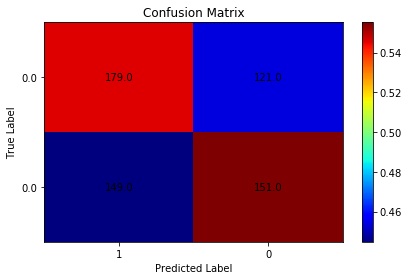

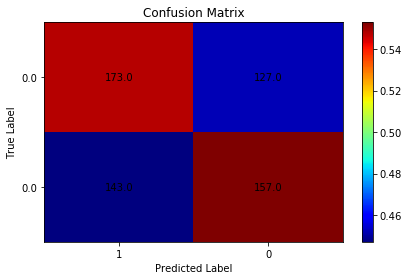

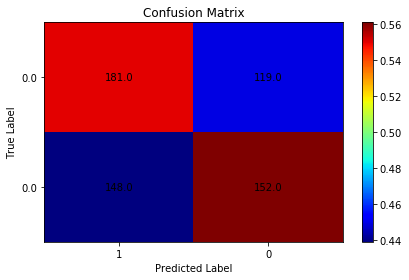

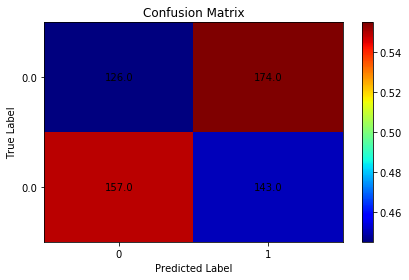

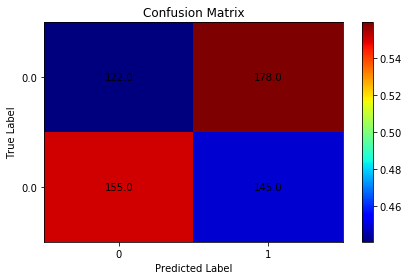

In [36]:
parameter_sweep(data, true_labels, 2)

# Simulation 8: 